<a href="https://colab.research.google.com/github/lotterinng/Network_Analysis-of-Botswana-Stock-Exchange/blob/main/Network_Analysis___Botswana_Stock_Exchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


METHODOLOGY STEP 1: DATA COLLECTION & PREPARATION
📋 OBJECTIVE: Load BSE ownership data and prepare for network analysis
--------------------------------------------------------------------------------
✓ Data loaded from: /content/network_data_BSE.csv
📊 RAW DATA OVERVIEW:
   • Shape: (107, 3)
   • Columns: ['Shareholder', 'Company', 'Share percentage']
   • Memory usage: 2.6 KB
✓ COLUMN MAPPING:
   • Company: 'Company'
   • Shareholder: 'Shareholder'
   • Stake: 'Share percentage'
📈 DATA CLEANING RESULTS:
   • Records: 107 → 107 → 107
   • Data loss: 0.0%
   • Unique entities: 14 companies, 89 shareholders
   • Average stake size: 0.1086

METHODOLOGY STEP 2: BIPARTITE NETWORK CONSTRUCTION
📋 OBJECTIVE: Build two-mode network representing shareholder-company relationships
--------------------------------------------------------------------------------
🕸️  BIPARTITE NETWORK STRUCTURE:
   • Nodes: 14 companies + 89 shareholders = 103 total
   • Edges: 107 ownership relationships
   • Densi

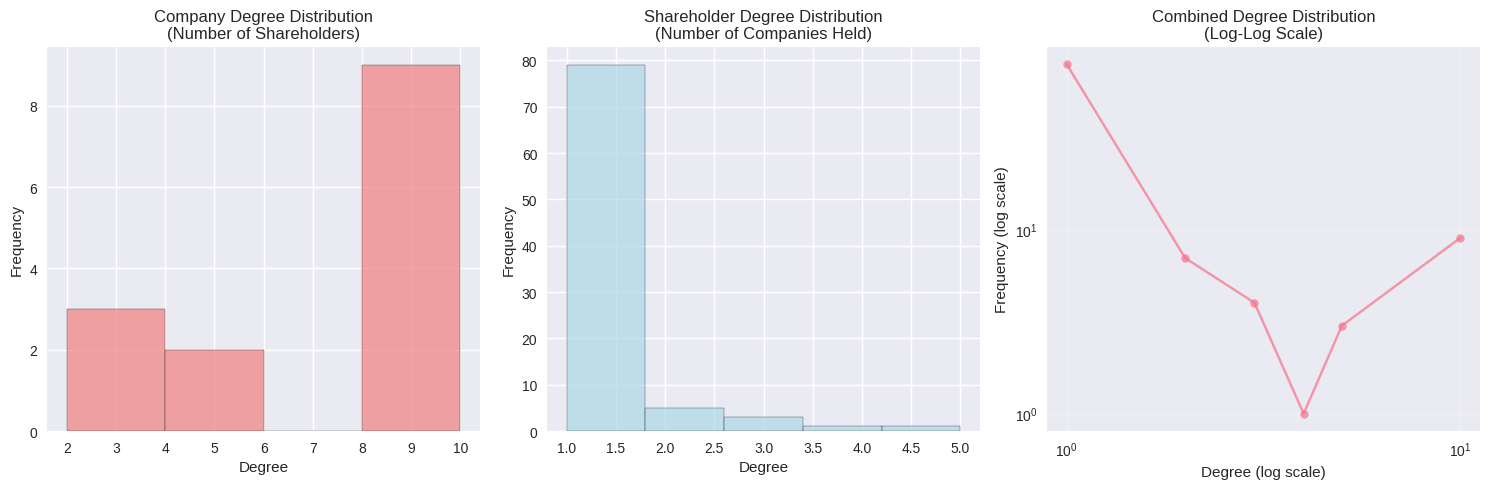


METHODOLOGY STEP 4: CENTRALITY ANALYSIS
📋 OBJECTIVE: Identify key players using multiple centrality measures
--------------------------------------------------------------------------------
🎯 CENTRALITY ANALYSIS RESULTS:
   • HITS algorithm: ✓ Success
   • Betweenness centrality: ✓ Success

🔍 KEY RESULTS - TOP COMPANIES BY DEGREE
────────────────────────────────────────────────────────────
All 5 observations:
                                       node  degree  strength  degree_centrality
                 Absa Bank Botswana Limited      10    0.8935           0.098039
        Botswana Insurance Holdings Limited      10    0.8254           0.098039
                     Chobe Holdings Limited      10    0.8500           0.098039
                  Cresta Marakanelo Limited      10    0.8572           0.098039
First National Bank Botswana Limited (FNBB)      10    0.8131           0.098039


🔍 KEY RESULTS - TOP SHAREHOLDERS BY DEGREE
───────────────────────────────────────────────────────

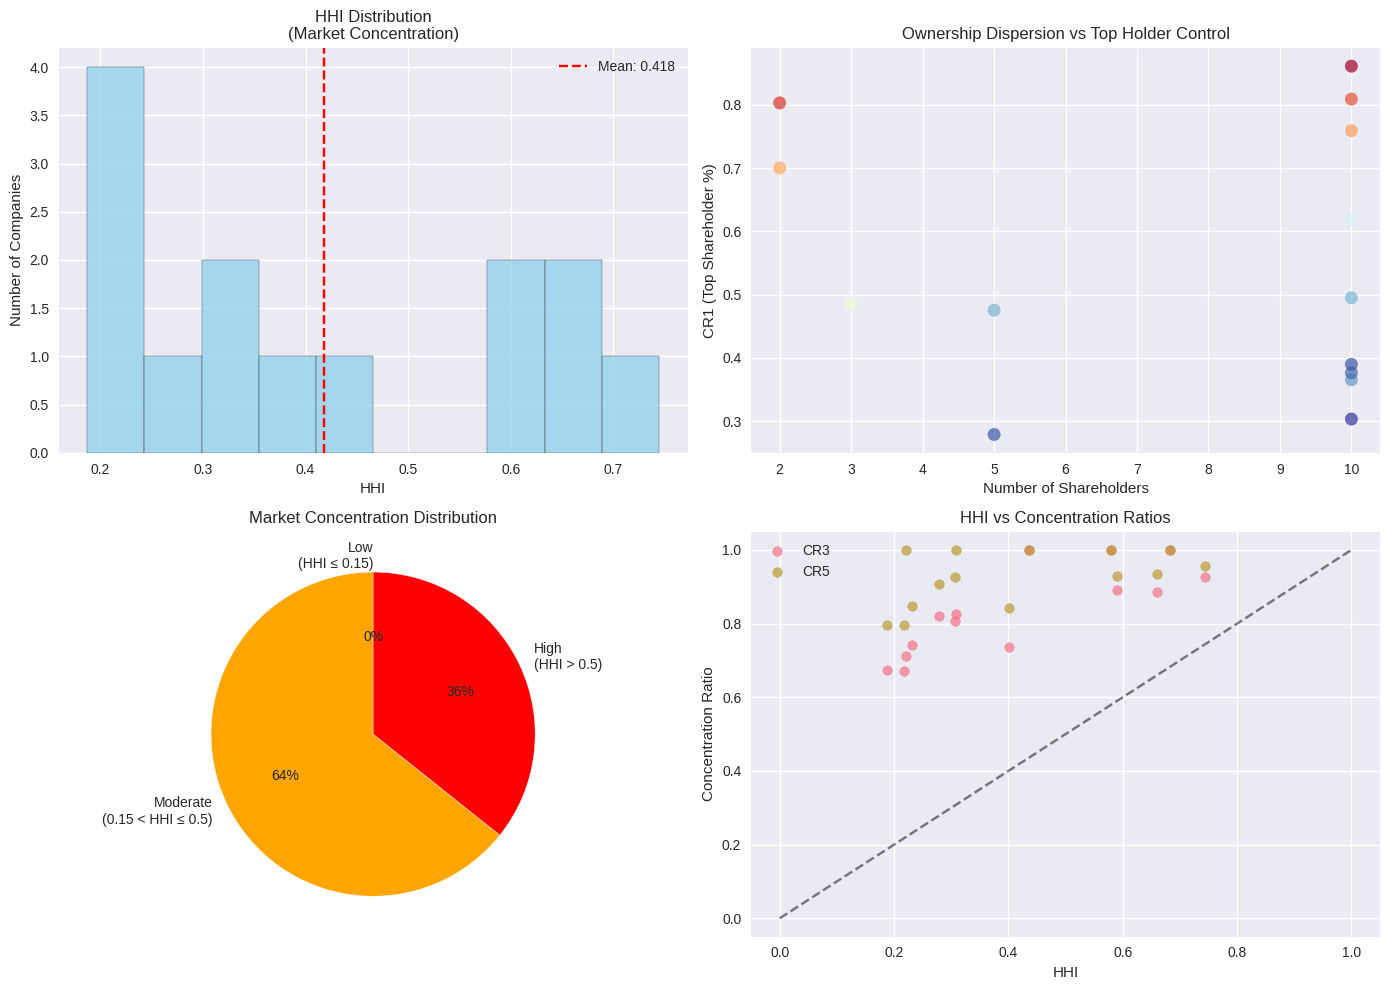


METHODOLOGY STEP 6: PORTFOLIO DIVERSIFICATION ANALYSIS
📋 OBJECTIVE: Analyze shareholder investment strategies and diversification
--------------------------------------------------------------------------------
💼 PORTFOLIO ANALYSIS:
   • Average portfolio size: 1.2 companies
   • Largest portfolio: 5 companies
   • Investment strategies: 79 focused, 6 concentrated, 4 balanced, 0 diversified
   • Institutional investors (≥3 companies): 5

🔍 KEY RESULTS - TOP SHAREHOLDERS BY PORTFOLIO SIZE
────────────────────────────────────────────────────────────
All 10 observations:
                                       shareholder  portfolio_size  total_investment investment_strategy                                                                                                       companies_held
             Botswana Public Officers Pension Fund               5            1.0628            Balanced                      Botswana Insurance Holdings Limited, Letshego Holdings Limited, New African 

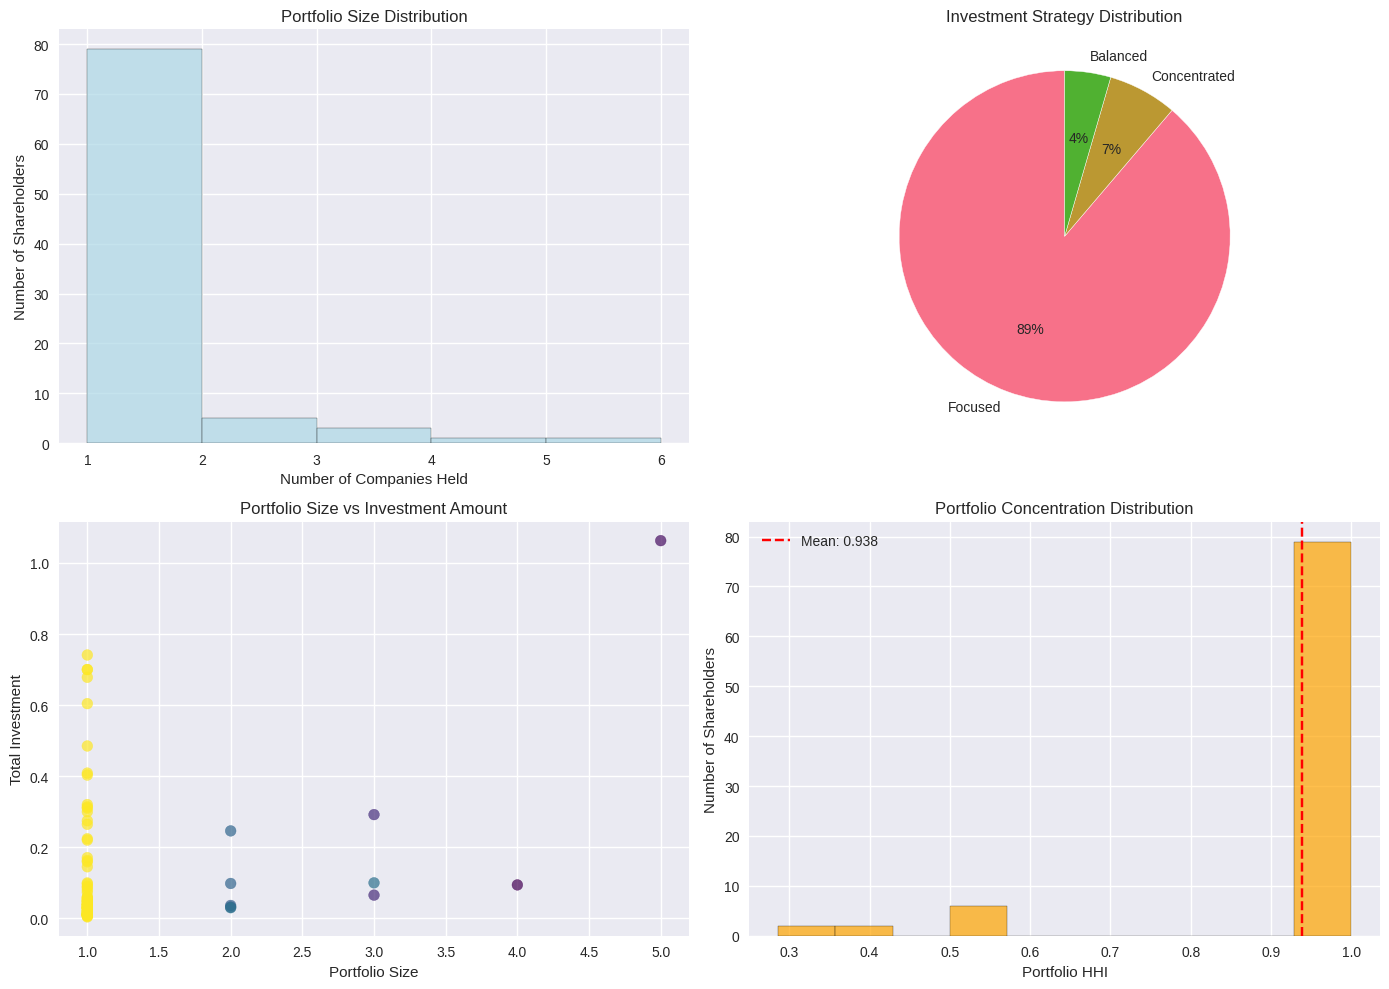


METHODOLOGY STEP 7: NETWORK PROJECTIONS & COMMUNITY DETECTION
📋 OBJECTIVE: Create one-mode projections and detect community structures
--------------------------------------------------------------------------------
🕸️  NETWORK PROJECTIONS:
   • Company network: 14 nodes, 23 edges
   • Shareholder network: 89 nodes, 420 edges
   • Communities detected: 5
   • Modularity score: 0.050

🔍 KEY RESULTS - TOP COMPANY SIMILARITIES
────────────────────────────────────────────────────────────
All 10 observations:
                           company1                          company2  similarity
  PrimeTime Property Holdings (PTP)  Sechaba Brewery Holdings Limited    0.572783
       New African Properties (NAP) PrimeTime Property Holdings (PTP)    0.507811
       New African Properties (NAP)  Sechaba Brewery Holdings Limited    0.397631
Botswana Insurance Holdings Limited PrimeTime Property Holdings (PTP)    0.112867
      Letlole La Rona Limited (LLR)      New African Properties (NAP)    0.1056

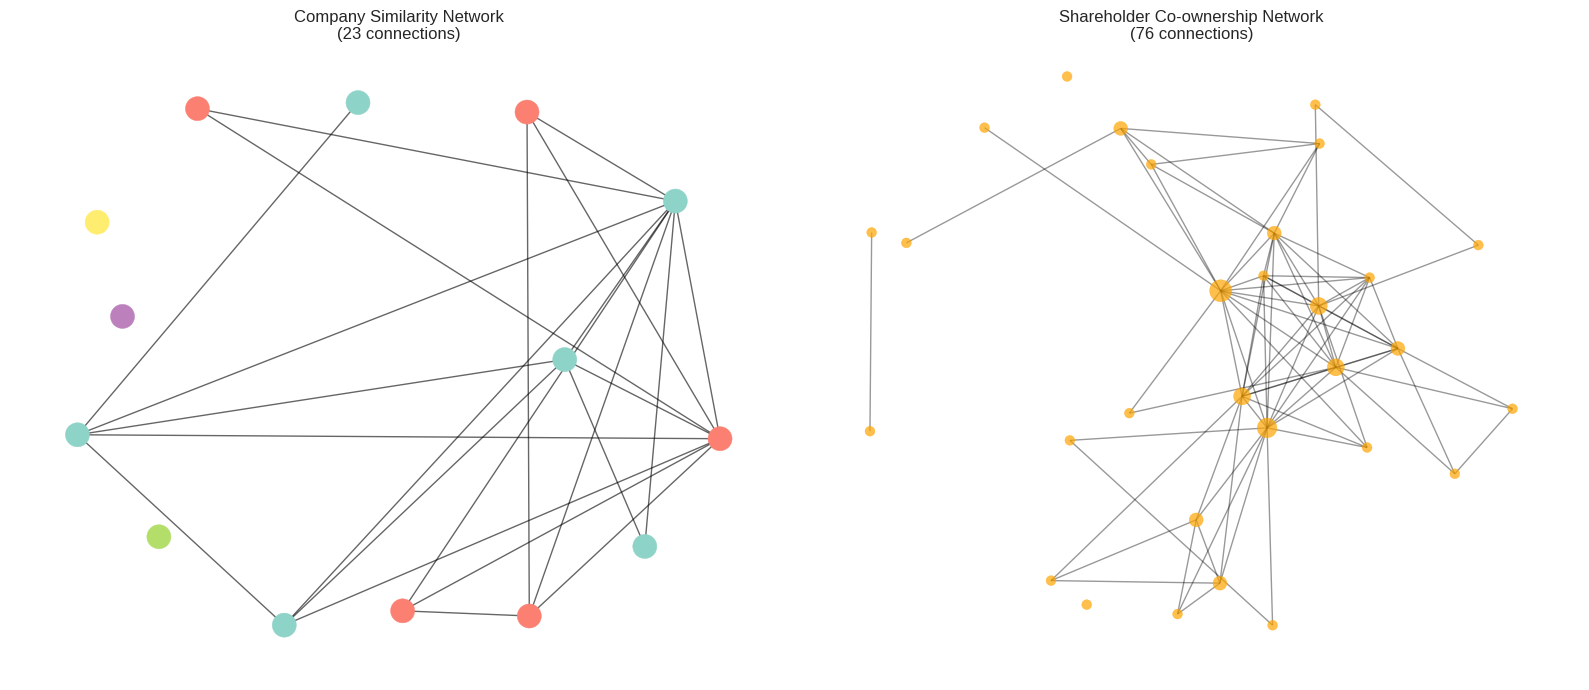


METHODOLOGY STEP 8: STRUCTURAL ANALYSIS & SYSTEMIC RISK
📋 OBJECTIVE: Identify structural patterns, cycles, and systemic vulnerabilities
--------------------------------------------------------------------------------
⚠️  STRUCTURAL ANALYSIS:
   • Estimated 4-cycles: 10
   • Cross-ownership entities: 0
   • Network inequality (Gini): 0.447
   • Network fragility score: 30.9%
   • Network hub nodes: 9

🔍 KEY RESULTS - NETWORK FRAGILITY ANALYSIS
────────────────────────────────────────────────────────────
All 5 observations:
 shareholders_removed  largest_component_size  fragility_percentage
                    1                      10              9.090909
                    2                       9             18.181818
                    3                       8             27.272727
                    4                       7             36.363636
                    5                       4             63.636364



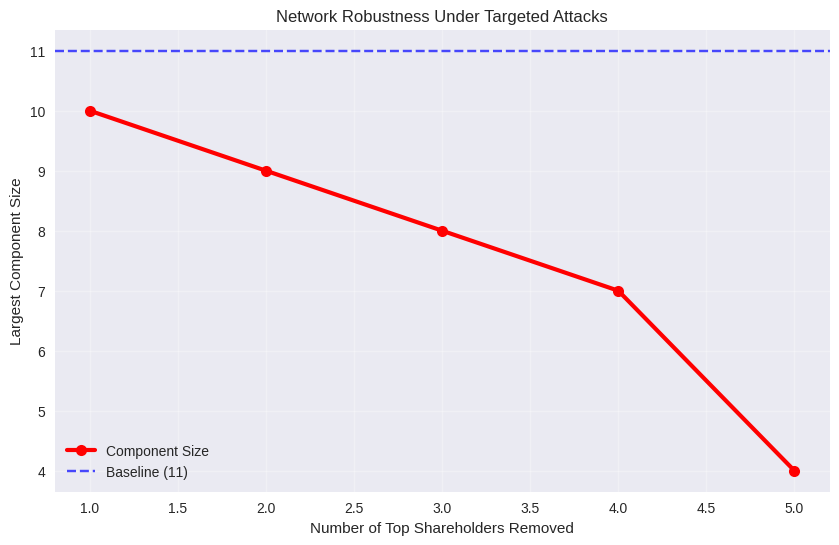


METHODOLOGY STEP FINAL: METHODOLOGY SUMMARY & EXPORT
📋 OBJECTIVE: Compile comprehensive results and export for presentation
--------------------------------------------------------------------------------

🎯 BSE OWNERSHIP NETWORK - FINAL METHODOLOGY SUMMARY
═══════════════════════════════════════════════════════════════════════════════

📊 DATASET CHARACTERISTICS:
   • 14 companies, 89 shareholders
   • 107 ownership relationships analyzed
   • Network density: 0.0204

🏢 CONCENTRATION FINDINGS:
   • Mean HHI: 0.418
   • Highly concentrated companies: 5
   • Companies with majority control: 6

💼 PORTFOLIO INSIGHTS:
   • Average portfolio size: 1.2 companies
   • Diversified investors: 0

🕸️  NETWORK STRUCTURE:
   • Company network connections: 23
   • Communities detected: 5

⚠️  SYSTEMIC RISK INDICATORS:
   • Ownership cycles detected: 10
   • Network fragility score: 30.9%
   • Cross-ownership entities: 0

📁 METHODOLOGY OUTPUTS SAVED:
   • Step-by-step analysis results in /mnt/data/
 

In [ ]:
# BSE ownership network analysis (end-to-end, step-by-step)
#
# This script builds a bipartite (2-mode) network of Shareholder ↔ Company from the uploaded CSV,
# computes concentration & influence metrics, centralities, projections, communities,
# mixing/E–I indices, motif diagnostics, and a few stress tests.
#
# It outputs CSVs to /mnt/data and shows a few preview tables & charts.
#
# ---- Assumptions / Robustness ----
# - The CSV is expected at /mnt/data/network_data_BSE.csv
# - Column names are guessed heuristically if not provided exactly:
#   * company: one of ['company','issuer','firm','company_name','counter','bse_company']
#   * shareholder: one of ['shareholder','holder','investor','owner','entity','name']
#   * stake (%): one of ['percent','percentage','share_pct','stake','holding','shares_%','ownership','share_percentage','%','pct']
#   * optional company attributes: sector (['sector','industry']),
#   * optional shareholder attributes: type (['shareholder_type','type','investor_type','category']),
#                                     origin (['origin','country','nationality','domicile'])
# - If stake values look like 0–100, we convert to fraction 0–1. If already in 0–1, we leave them.
#
# If anything is missing, the analysis will gracefully skip those parts, but still produce core outputs.
#
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import math
import itertools as it
from collections import defaultdict, Counter
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.collections import LineCollection
import seaborn as sns
import warnings
from pathlib import Path

# Optional scipy imports (will skip if not available)
try:
    from scipy.cluster.hierarchy import dendrogram, linkage
    from scipy.spatial.distance import squareform
    HAS_SCIPY = True
except ImportError:
    HAS_SCIPY = False

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Configure matplotlib and seaborn for better plots
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 150
sns.set_style("whitegrid")

# Set pandas display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

out_dir = Path("/mnt/data")
out_dir.mkdir(parents=True, exist_ok=True)

def display_dataframe_to_user(title, df, max_rows=20):
    """Custom function to replace the missing caas_jupyter_tools import"""
    print(f"\n{'='*60}")
    print(f"{title}")
    print(f"{'='*60}")
    if len(df) > max_rows:
        print(f"Showing top {max_rows} rows of {len(df)} total rows:\n")
        print(df.head(max_rows).to_string(index=False))
    else:
        print(f"Showing all {len(df)} rows:\n")
        print(df.to_string(index=False))
    print()

# ----------------------
# 1) Load data
# ----------------------
def load_data(csv_path):
    """Load and validate the input CSV file"""
    try:
        if Path(csv_path).exists():
            df_raw = pd.read_csv(csv_path)
            print(f"✓ Successfully loaded data from {csv_path}")
            print(f"  Shape: {df_raw.shape}")
            print(f"  Columns: {list(df_raw.columns)}")
            return df_raw
        else:
            raise FileNotFoundError(f"CSV file not found at {csv_path}")
    except Exception as e:
        print(f"Error loading data: {e}")
        raise

# Try multiple possible paths
possible_paths = [
    "/content/network_data_BSE.csv",
    "/mnt/data/network_data_BSE.csv",
    "network_data_BSE.csv"
]

df_raw = None
for csv_path in possible_paths:
    try:
        df_raw = load_data(csv_path)
        break
    except FileNotFoundError:
        continue

if df_raw is None:
    raise FileNotFoundError(f"Could not find CSV file in any of these locations: {possible_paths}")

# ----------------------
# 2) Column inference
# ----------------------
def infer_col(df, candidates):
    """Infer column names using fuzzy matching"""
    # First try exact match (case insensitive)
    for c in candidates:
        for col in df.columns:
            if col.strip().lower() == c:
                return col
    # Then try contains match
    for c in candidates:
        for col in df.columns:
            if c in col.strip().lower():
                return col
    return None

company_col = infer_col(df_raw, ['company','issuer','firm','company_name','counter','bse_company'])
shareholder_col = infer_col(df_raw, ['shareholder','holder','investor','owner','entity','name'])
stake_col = infer_col(df_raw, ['percent','percentage','share_pct','stake','holding','shares_%','ownership','share_percentage','%','pct'])

sector_col = infer_col(df_raw, ['sector','industry'])
sh_type_col = infer_col(df_raw, ['shareholder_type','type','investor_type','category'])
sh_origin_col = infer_col(df_raw, ['origin','country','nationality','domicile'])

needed = [company_col, shareholder_col, stake_col]
if any(x is None for x in needed):
    raise ValueError(f"Could not infer key columns. Found -> company:{company_col}, shareholder:{shareholder_col}, stake:{stake_col}\n"
                     f"Available columns: {list(df_raw.columns)}")

print(f"✓ Column mapping successful:")
print(f"  Company: {company_col}")
print(f"  Shareholder: {shareholder_col}")
print(f"  Stake: {stake_col}")
if sector_col: print(f"  Sector: {sector_col}")
if sh_type_col: print(f"  Shareholder Type: {sh_type_col}")
if sh_origin_col: print(f"  Shareholder Origin: {sh_origin_col}")

# ----------------------
# 3) Clean & normalize
# ----------------------
df = df_raw.copy()

# Trim whitespace
for c in [company_col, shareholder_col]:
    df[c] = df[c].astype(str).str.strip()

# Parse stake to numeric
df[stake_col] = pd.to_numeric(df[stake_col], errors='coerce')

# Drop missing essentials
before_drop = len(df)
df = df.dropna(subset=[company_col, shareholder_col, stake_col])
after_drop = len(df)
if before_drop != after_drop:
    print(f"⚠ Dropped {before_drop - after_drop} rows with missing essential data")

# Normalize stake to fraction [0,1]
def normalize_stake(series):
    """Convert stakes to fraction format (0-1)"""
    # If most values > 1, assume 0–100 percentages
    if (series.dropna() > 1).mean() > 0.5:
        print("  Converting stakes from percentage (0-100) to fraction (0-1)")
        return series / 100.0
    else:
        print("  Stakes already in fraction format (0-1)")
        return series

df['stake_frac'] = normalize_stake(df[stake_col].astype(float)).clip(lower=0)

# Optional: collapse duplicate records (same shareholder-company) by summing stakes
before_dedup = len(df)
agg_dict = {'stake_frac': 'sum'}
if sector_col: agg_dict[sector_col] = 'first'
if sh_type_col: agg_dict[sh_type_col] = 'first'
if sh_origin_col: agg_dict[sh_origin_col] = 'first'

df = df.groupby([company_col, shareholder_col], as_index=False).agg(agg_dict)
after_dedup = len(df)
if before_dedup != after_dedup:
    print(f"⚠ Collapsed {before_dedup - after_dedup} duplicate records by summing stakes")

print(f"✓ Final dataset: {len(df)} ownership records")
print(f"  Companies: {df[company_col].nunique()}")
print(f"  Shareholders: {df[shareholder_col].nunique()}")
print(f"  Average stake: {df['stake_frac'].mean():.4f}")

# ----------------------
# 4) Build bipartite graph
# ----------------------
B = nx.Graph()
companies = df[company_col].unique().tolist()
shareholders = df[shareholder_col].unique().tolist()

B.add_nodes_from(companies, bipartite=0, ntype='company')
B.add_nodes_from(shareholders, bipartite=1, ntype='shareholder')

# Add attrs
if sector_col:
    comp_sector = df[[company_col, sector_col]].drop_duplicates().set_index(company_col)[sector_col].to_dict()
    nx.set_node_attributes(B, comp_sector, 'sector')

if sh_type_col:
    sh_type = df[[shareholder_col, sh_type_col]].drop_duplicates().set_index(shareholder_col)[sh_type_col].to_dict()
    nx.set_node_attributes(B, sh_type, 'sh_type')

if sh_origin_col:
    sh_origin = df[[shareholder_col, sh_origin_col]].drop_duplicates().set_index(shareholder_col)[sh_origin_col].to_dict()
    nx.set_node_attributes(B, sh_origin, 'origin')

# Edges with weight = fraction
for _, row in df.iterrows():
    B.add_edge(row[company_col], row[shareholder_col], weight=row['stake_frac'], stake_frac=row['stake_frac'])

print(f"✓ Built bipartite network: {B.number_of_nodes()} nodes, {B.number_of_edges()} edges")

# ----------------------
# 5) Company-side concentration & control
# ----------------------
def company_concentration(df, company_col, shareholder_col):
    """Calculate concentration metrics for each company"""
    rows = []
    for c, g in df.groupby(company_col):
        w = np.sort(g['stake_frac'].values)[::-1]
        total = w.sum()
        w_norm = w / total if total > 0 else w
        hhi = (w_norm**2).sum()
        entropy = -(w_norm[w_norm>0]*np.log(w_norm[w_norm>0])).sum()
        # normalize entropy by log(n) for comparability (optional)
        ent_norm = entropy / np.log(len(w_norm)) if len(w_norm) > 1 else 0.0

        cr1 = w_norm[:1].sum()
        cr3 = w_norm[:3].sum()
        cr5 = w_norm[:5].sum()
        top_holder = g.sort_values('stake_frac', ascending=False).iloc[0][shareholder_col]
        control_50 = (w_norm >= 0.5).any()
        control_75 = (w_norm >= 0.75).any()
        rows.append({
            'company': c,
            'num_shareholders': len(w),
            'total_recorded_stake': float(total),
            'HHI': float(hhi),
            'entropy_norm': float(ent_norm),
            'CR1': float(cr1),
            'CR3': float(cr3),
            'CR5': float(cr5),
            'top_holder': top_holder,
            'control_ge_50': bool(control_50),
            'control_ge_75': bool(control_75),
        })
    return pd.DataFrame(rows).sort_values(['HHI','CR5'], ascending=[False, False])

company_conc = company_concentration(df, company_col, shareholder_col)
company_conc_path = out_dir / "company_concentration.csv"
company_conc.to_csv(company_conc_path, index=False)
print(f"✓ Saved company concentration metrics to {company_conc_path}")

# ----------------------
# 6) Shareholder-side diversification & influence
# ----------------------
def shareholder_influence(df, shareholder_col, company_col):
    """Calculate influence and diversification metrics for each shareholder"""
    rows = []
    # Optional sector exposure
    if sector_col and sector_col in df.columns:
        comp_to_sector = df[[company_col, sector_col]].drop_duplicates().set_index(company_col)[sector_col].to_dict()
    else:
        comp_to_sector = {}
    for s, g in df.groupby(shareholder_col):
        w = g['stake_frac'].values
        companies_held = g[company_col].tolist()
        deg = len(companies_held)
        w_sum = w.sum()
        w_mean = w.mean() if deg > 0 else 0
        w_entropy = -( (w/w_sum)[w_sum>0] * np.log( (w/w_sum)[w_sum>0] ) ).sum() if w_sum>0 else 0.0
        sectors = [comp_to_sector.get(c, None) for c in companies_held]
        sector_breadth = len(set([x for x in sectors if pd.notna(x)])) if sectors else 0
        rows.append({
            'shareholder': s,
            'degree_companies': deg,
            'total_stake_sum': float(w_sum),
            'mean_stake': float(w_mean),
            'stake_entropy': float(w_entropy),
            'sector_breadth': int(sector_breadth),
        })
    return pd.DataFrame(rows).sort_values(['degree_companies','total_stake_sum'], ascending=[False, False])

sh_influence = shareholder_influence(df, shareholder_col, company_col)
sh_influence_path = out_dir / "shareholder_influence.csv"
sh_influence.to_csv(sh_influence_path, index=False)
print(f"✓ Saved shareholder influence metrics to {sh_influence_path}")

# ----------------------
# 7) HITS (hubs/authorities) & bipartite betweenness
# ----------------------
# Build directed graph: shareholder -> company
D = nx.DiGraph()
for s in shareholders:
    D.add_node(s, ntype='shareholder')
for c in companies:
    D.add_node(c, ntype='company')

for _, row in df.iterrows():
    D.add_edge(row[shareholder_col], row[company_col])  # unweighted HITS

try:
    hubs, authorities = nx.hits(D, max_iter=500, tol=1e-08, normalized=True)
    print("✓ HITS algorithm completed successfully")
except Exception as e:
    hubs, authorities = {}, {}
    print(f"⚠ HITS failed: {e}")

hits_rows = []
for n in D.nodes():
    hits_rows.append({
        'node': n,
        'ntype': D.nodes[n].get('ntype'),
        'hub_score': hubs.get(n, np.nan),
        'authority_score': authorities.get(n, np.nan)
    })
hits_df = pd.DataFrame(hits_rows)
hits_path = out_dir / "hits_scores.csv"
hits_df.to_csv(hits_path, index=False)

# Bipartite betweenness centrality
try:
    bc_bip = nx.algorithms.bipartite.betweenness_centrality(B, nodes=companies)  # computing using companies as top set
    print("✓ Bipartite betweenness centrality completed")
except Exception as e:
    bc_bip = {}
    print(f"⚠ Bipartite betweenness failed: {e}")

bc_df = pd.DataFrame([{'node': n, 'betweenness_bipartite': v, 'ntype': B.nodes[n].get('ntype')} for n, v in bc_bip.items()])
bc_path = out_dir / "bipartite_betweenness.csv"
bc_df.to_csv(bc_path, index=False)

# ----------------------
# 8) One-mode projections (Company↔Company and Shareholder↔Shareholder)
#    with Jaccard, Cosine (weighted), and share-weighted overlap
# ----------------------
print("Computing network projections...")

# Build incidence matrix M: rows=shareholders, cols=companies, values=stake_frac
sh_list = sorted(shareholders)
co_list = sorted(companies)
M = pd.DataFrame(0.0, index=sh_list, columns=co_list)

for _, row in df.iterrows():
    M.at[row[shareholder_col], row[company_col]] = row['stake_frac']

# Binary neighbor sets for Jaccard
neighbors_sh_of_company = {c: set(M.index[M[c] > 0.0]) for c in co_list}

def jaccard_company_pairs(neighbors_dict, min_common=1):
    pairs = []
    for i, c1 in enumerate(co_list):
        n1 = neighbors_dict[c1]
        for c2 in co_list[i+1:]:
            n2 = neighbors_dict[c2]
            inter = len(n1 & n2)
            if inter >= min_common:
                union = len(n1 | n2)
                jac = inter / union if union > 0 else 0.0
                pairs.append((c1, c2, jac, inter))
    return pd.DataFrame(pairs, columns=['company_u','company_v','jaccard','n_common_shareholders'])

company_jaccard = jaccard_company_pairs(neighbors_sh_of_company, min_common=1)
company_jaccard_path = out_dir / "company_projection_jaccard.csv"
company_jaccard.to_csv(company_jaccard_path, index=False)

# Cosine similarity (weighted by stake fractions)
V = M.values
norms = np.linalg.norm(V, axis=0)
dot = V.T @ V
# avoid division by zero
norms[norms == 0] = 1e-12
cosine_sim = dot / np.outer(norms, norms)

# Convert to edges
cos_edges = []
for i, ci in enumerate(co_list):
    for j in range(i+1, len(co_list)):
        cj = co_list[j]
        cos_edges.append((ci, cj, float(cosine_sim[i, j])))
company_cosine = pd.DataFrame(cos_edges, columns=['company_u','company_v','cosine'])
company_cosine_path = out_dir / "company_projection_cosine.csv"
company_cosine.to_csv(company_cosine_path, index=False)

# Share-weighted overlap: sum over shareholders of min(w_i, w_j)
def share_weighted_overlap(M):
    overlaps = []
    arr = M.values
    for i in range(arr.shape[1]):
        for j in range(i+1, arr.shape[1]):
            wmin = np.minimum(arr[:, i], arr[:, j]).sum()
            overlaps.append((co_list[i], co_list[j], float(wmin)))
    return pd.DataFrame(overlaps, columns=['company_u','company_v','weighted_overlap'])

company_overlap = share_weighted_overlap(M)
company_overlap_path = out_dir / "company_projection_weighted_overlap.csv"
company_overlap.to_csv(company_overlap_path, index=False)

# Build a weighted company-projection graph (using cosine as weights for community detection)
G_comp = nx.Graph()
G_comp.add_nodes_from(co_list)
# Attach sector
if sector_col:
    for c in co_list:
        if c in comp_sector:
            G_comp.nodes[c]['sector'] = comp_sector[c]

# Use cosine threshold to reduce noise
cosine_threshold = np.quantile(company_cosine['cosine'], 0.9) if len(company_cosine) > 0 else 0.0
for _, r in company_cosine.iterrows():
    if r['cosine'] >= cosine_threshold and r['company_u'] != r['company_v'] and r['cosine'] > 0:
        G_comp.add_edge(r['company_u'], r['company_v'], weight=r['cosine'])

# Shareholder projection (binary co-ownership count)
neighbors_co_of_shareholder = {s: set(M.columns[M.loc[s] > 0.0]) for s in sh_list}

def shareholder_projection_counts(neighbors_dict):
    pairs = []
    shs = list(neighbors_dict.keys())
    for i, s1 in enumerate(shs):
        n1 = neighbors_dict[s1]
        for j in range(i+1, len(shs)):
            s2 = shs[j]
            inter = len(n1 & neighbors_dict[s2])
            if inter > 0:
                pairs.append((s1, s2, inter))
    return pd.DataFrame(pairs, columns=['shareholder_u','shareholder_v','n_coowned_companies'])

sh_proj_counts = shareholder_projection_counts(neighbors_co_of_shareholder)
sh_proj_counts_path = out_dir / "shareholder_projection_counts.csv"
sh_proj_counts.to_csv(sh_proj_counts_path, index=False)

G_sh = nx.Graph()
G_sh.add_nodes_from(sh_list)
# Attach attributes if available
if sh_type_col:
    for s in sh_list:
        if s in sh_type:
            G_sh.nodes[s]['sh_type'] = sh_type[s]
if sh_origin_col:
    for s in sh_list:
        if s in sh_origin:
            G_sh.nodes[s]['origin'] = sh_origin[s]

# Build edges with weight = n_coowned_companies, keep top decile weights
if len(sh_proj_counts) > 0:
    thr = np.quantile(sh_proj_counts['n_coowned_companies'], 0.9)
    for _, r in sh_proj_counts.iterrows():
        if r['n_coowned_companies'] >= thr:
            G_sh.add_edge(r['shareholder_u'], r['shareholder_v'], weight=int(r['n_coowned_companies']))

print(f"✓ Company projection graph: {G_comp.number_of_nodes()} nodes, {G_comp.number_of_edges()} edges")
print(f"✓ Shareholder projection graph: {G_sh.number_of_nodes()} nodes, {G_sh.number_of_edges()} edges")

# ----------------------
# 9) Communities, k-core, bridging
# ----------------------
print("Computing communities and centrality measures...")

# Communities (greedy modularity) on company projection
if G_comp.number_of_edges() > 0:
    communities = list(nx.algorithms.community.greedy_modularity_communities(G_comp, weight='weight'))
    comp_community_map = {}
    for cid, comm in enumerate(communities):
        for node in comm:
            comp_community_map[node] = cid
    nx.set_node_attributes(G_comp, comp_community_map, 'community')
    print(f"✓ Found {len(communities)} communities in company projection")
else:
    comp_community_map = {}
    print("⚠ No edges in company projection for community detection")

comp_comm_df = pd.DataFrame([{'company': n, 'community': comp_community_map.get(n, None)} for n in co_list])
comp_comm_path = out_dir / "communities_company.csv"
comp_comm_df.to_csv(comp_comm_path, index=False)

# k-core for company projection
if G_comp.number_of_nodes() > 0:
    core_num = nx.core_number(G_comp) if G_comp.number_of_edges() > 0 else {n: 0 for n in G_comp.nodes()}
else:
    core_num = {}
core_df = pd.DataFrame([{'company': n, 'core_number': core_num.get(n, 0)} for n in co_list])
core_path = out_dir / "company_kcore.csv"
core_df.to_csv(core_path, index=False)

# Bridging centrality approximation (bridging coefficient × betweenness)
def bridging_centrality(G):
    if G.number_of_nodes() == 0:
        return {}
    deg = dict(G.degree())
    # Avoid division by zero
    bc = nx.betweenness_centrality(G, weight='weight', normalized=True) if G.number_of_edges() > 0 else {n:0.0 for n in G.nodes()}
    bcoef = {}
    for u in G.nodes():
        if deg[u] == 0:
            bcoef[u] = 0.0
        else:
            s = 0.0
            for v in G.neighbors(u):
                dv = deg[v]
                if dv > 0:
                    s += 1.0/dv
            bcoef[u] = (1.0/deg[u]) * s if deg[u] > 0 else 0.0
    return {u: bcoef[u]*bc[u] for u in G.nodes()}

bridging = bridging_centrality(G_comp)
bridging_df = pd.DataFrame([{'company': n, 'bridging_centrality': v} for n, v in bridging.items()])
bridging_path = out_dir / "company_bridging_centrality.csv"
bridging_df.to_csv(bridging_path, index=False)

# ----------------------
# 10) Assortativity & E–I index
# ----------------------
print("Computing mixing patterns and assortativity...")

def EI_index_by_group(G, group_attr):
    """Computes E–I for each group: (E - I) / (E + I), where E edges go outside, I edges are within group."""
    if G.number_of_edges() == 0:
        return pd.DataFrame(columns=['group','E','I','EI'])
    groups = defaultdict(list)
    for n, d in G.nodes(data=True):
        groups[d.get(group_attr, None)].append(n)
    rows = []
    for g, nodes in groups.items():
        if g is None:
            continue
        E = 0
        I = 0
        node_set = set(nodes)
        for u in nodes:
            for v in G.neighbors(u):
                if v in node_set:
                    I += 1
                else:
                    E += 1
        # Each internal edge counted twice, external once per end, divide by 2 for I
        I = I/2
        EI = (E - I) / (E + I) if (E + I) > 0 else np.nan
        rows.append({'group': g, 'E': E, 'I': I, 'EI': EI})
    return pd.DataFrame(rows).sort_values('EI', ascending=False)

# Company projection: assortativity by sector if available
assort_company_sector = None
ei_company_sector_df = None
if sector_col and G_comp.number_of_edges() > 0:
    try:
        assort_company_sector = nx.attribute_assortativity_coefficient(G_comp, 'sector')
        print(f"✓ Company sector assortativity: {assort_company_sector:.4f}")
    except Exception as e:
        assort_company_sector = None
        print(f"⚠ Could not compute company sector assortativity: {e}")
    ei_company_sector_df = EI_index_by_group(G_comp, 'sector')
    ei_company_sector_path = out_dir / "EI_company_by_sector.csv"
    ei_company_sector_df.to_csv(ei_company_sector_path, index=False)

# Shareholder projection: assortativity by type/origin
assort_sh_type = None
ei_sh_type_df = None
if sh_type_col and G_sh.number_of_edges() > 0:
    try:
        assort_sh_type = nx.attribute_assortativity_coefficient(G_sh, 'sh_type')
        print(f"✓ Shareholder type assortativity: {assort_sh_type:.4f}")
    except Exception as e:
        assort_sh_type = None
        print(f"⚠ Could not compute shareholder type assortativity: {e}")
    ei_sh_type_df = EI_index_by_group(G_sh, 'sh_type')
    ei_sh_type_path = out_dir / "EI_shareholder_by_type.csv"
    ei_sh_type_df.to_csv(ei_sh_type_path, index=False)

assort_sh_origin = None
ei_sh_origin_df = None
if sh_origin_col and G_sh.number_of_edges() > 0:
    try:
        assort_sh_origin = nx.attribute_assortativity_coefficient(G_sh, 'origin')
        print(f"✓ Shareholder origin assortativity: {assort_sh_origin:.4f}")
    except Exception as e:
        assort_sh_origin = None
        print(f"⚠ Could not compute shareholder origin assortativity: {e}")
    ei_sh_origin_df = EI_index_by_group(G_sh, 'origin')
    ei_sh_origin_path = out_dir / "EI_shareholder_by_origin.csv"
    ei_sh_origin_df.to_csv(ei_sh_origin_path, index=False)

# Save assortativity summary
mixing_summary = pd.DataFrame([
    {'graph':'company_projection','attribute':'sector','assortativity':assort_company_sector},
    {'graph':'shareholder_projection','attribute':'type','assortativity':assort_sh_type},
    {'graph':'shareholder_projection','attribute':'origin','assortativity':assort_sh_origin},
])
mixing_summary_path = out_dir / "assortativity_summary.csv"
mixing_summary.to_csv(mixing_summary_path, index=False)

# ----------------------
# 11) Motifs & structural red flags
# ----------------------
print("Computing structural patterns and motifs...")

# 4-cycle (rectangle) count estimate:
def count_4cycles_from_M(Mbin):
    # Mbin is binary incidence
    A = (Mbin.values > 0).astype(int)
    # Compute S = A @ A.T : S[i,j] = number of common companies between shareholders i and j
    S = A @ A.T
    cycles = 0
    for i in range(S.shape[0]):
        for j in range(i+1, S.shape[0]):
            s = S[i, j]
            if s >= 2:
                cycles += math.comb(int(s), 2)
    return int(cycles)

Mbin = (M > 0).astype(int)
cycles_4 = count_4cycles_from_M(Mbin)

# Cross-ownership loops (company name also appears as a shareholder name)
company_set = set(companies)
shareholder_set = set(shareholders)
cross_names = sorted(company_set & shareholder_set)

print(f"✓ Found {cycles_4} estimated 4-cycles")
print(f"✓ Found {len(cross_names)} cross-ownership name overlaps")

# Single-point-of-failure analysis
def company_projection_from_cosine(cosine_edges, threshold=None, companies=None):
    """Build company projection from cosine edges"""
    if companies is None:
        companies = []
    G = nx.Graph()
    G.add_nodes_from(companies)
    if cosine_edges is None or len(cosine_edges) == 0:
        return G
    thr = threshold if threshold is not None else np.quantile(cosine_edges['cosine'], 0.9)
    for _, r in cosine_edges.iterrows():
        if r['cosine'] >= thr and r['company_u'] != r['company_v'] and r['cosine'] > 0:
            G.add_edge(r['company_u'], r['company_v'], weight=r['cosine'])
    return G

def largest_component_size(G):
    if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        return 0
    comps = list(nx.connected_components(G))
    return max((len(c) for c in comps)) if comps else 0

# baseline
baseline_gc = largest_component_size(G_comp)

# remove top shareholders by degree
sh_degree = dict(B.degree(shareholders))
top_sh = sorted(sh_degree.items(), key=lambda x: x[1], reverse=True)[:5]
stress_rows = []

for k in range(1, min(6, len(top_sh))+1):
    remove_set = [s for s, _ in top_sh[:k]]
    # recompute cosine on reduced matrix
    M2 = M.drop(index=[x for x in remove_set if x in M.index])
    if M2.shape[0] == 0:
        gc2 = 0
    else:
        V2 = M2.values
        norms2 = np.linalg.norm(V2, axis=0)
        norms2[norms2 == 0] = 1e-12
        dot2 = V2.T @ V2
        cosine2 = dot2 / np.outer(norms2, norms2)
        cos_edges2 = []
        cols2 = list(M2.columns)
        for i, ci in enumerate(cols2):
            for j in range(i+1, len(cols2)):
                cj = cols2[j]
                cos_edges2.append((ci, cj, float(cosine2[i, j])))
        company_cosine2 = pd.DataFrame(cos_edges2, columns=['company_u','company_v','cosine'])
        thr2 = np.quantile(company_cosine2['cosine'], 0.9) if len(company_cosine2) > 0 else 0.0
        G_comp2 = company_projection_from_cosine(company_cosine2, thr2, cols2)
        gc2 = largest_component_size(G_comp2)
    stress_rows.append({'removed_top_k_shareholders': k, 'largest_component_size': gc2})

stress_df = pd.DataFrame(stress_rows)
stress_df_path = out_dir / "single_point_failure_company_projection.csv"
stress_df.to_csv(stress_df_path, index=False)

# Save motif & cross-ownership summary
motif_summary = pd.DataFrame([
    {'metric':'4_cycle_estimate', 'value': cycles_4},
    {'metric':'cross_ownership_name_overlap_count', 'value': len(cross_names)},
    {'metric':'baseline_largest_component_size', 'value': baseline_gc},
])
motif_summary_path = out_dir / "motif_cross_ownership_summary.csv"
motif_summary.to_csv(motif_summary_path, index=False)

if cross_names:
    cross_names_path = out_dir / "cross_ownership_name_overlap_list.csv"
    pd.DataFrame({'name_overlap_company_shareholder': cross_names}).to_csv(cross_names_path, index=False)

# ----------------------
# 12) Null model (label shuffling) for assortativity significance
# ----------------------
def shuffle_labels_and_metric(G, attr, trials=50, seed=42):
    if G.number_of_edges() == 0:
        return None
    rng = np.random.default_rng(seed)
    G_copy = G.copy()
    nodes_labeled = [n for n in G_copy.nodes() if G_copy.nodes[n].get(attr, None) is not None]
    if len(nodes_labeled) < 2:
        return None
    labels = [G_copy.nodes[n][attr] for n in nodes_labeled]
    metrics = []
    for t in range(trials):
        rng.shuffle(labels)
        # assign shuffled
        for i, n in enumerate(nodes_labeled):
            G_copy.nodes[n][attr] = labels[i]
        try:
            a = nx.attribute_assortativity_coefficient(G_copy, attr)
        except Exception:
            a = np.nan
        metrics.append(a)
    return pd.Series(metrics, name=f'{attr}_assort_null')

print("Computing null models...")

if sector_col and G_comp.number_of_edges() > 0:
    nulls = shuffle_labels_and_metric(G_comp, 'sector', trials=50)
    if nulls is not None:
        null_desc = nulls.describe()
        null_desc.to_csv(out_dir / "null_sector_assort_company_projection.csv")

if sh_type_col and G_sh.number_of_edges() > 0:
    nulls = shuffle_labels_and_metric(G_sh, 'sh_type', trials=50)
    if nulls is not None:
        nulls.describe().to_csv(out_dir / "null_type_assort_shareholder_projection.csv")

# ----------------------
# 13) Enhanced Visualizations
# ----------------------
print("Creating enhanced visualizations...")

# Set style for better plots
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        plt.style.use('default')

sns.set_palette("husl")

# ===== 1. COMPREHENSIVE OWNERSHIP HEATMAP WITH CLUSTERING =====
def create_clustered_heatmap():
    top_sh_n = min(40, len(sh_list))
    top_co_n = min(40, len(co_list))

    # Rank by degree and total stake
    sh_deg_rank = sh_influence.set_index('shareholder')['degree_companies'].sort_values(ascending=False)
    co_deg_rank = company_conc.set_index('company')['num_shareholders'].sort_values(ascending=False)

    top_sh_sel = list(sh_deg_rank.head(top_sh_n).index)
    top_co_sel = list(co_deg_rank.head(top_co_n).index)

    HM = M.loc[top_sh_sel, top_co_sel]

    # Create clustered heatmap if scipy is available, otherwise regular heatmap
    plt.figure(figsize=(16, 12))

    if HAS_SCIPY and len(HM) > 1 and len(HM.columns) > 1:
        try:
            # Use seaborn's clustermap for better visualization
            g = sns.clustermap(HM,
                               cmap='YlOrRd',
                               figsize=(16, 12),
                               xticklabels=False,  # Too many labels would be cluttered
                               yticklabels=False,
                               cbar_kws={'label': 'Ownership Stake'},
                               linewidths=0.1,
                               method='ward',
                               metric='euclidean')

            g.fig.suptitle('Clustered Ownership Matrix\n(Top Shareholders × Top Companies)',
                           fontsize=16, y=0.98)
        except Exception as e:
            print(f"Clustering failed, using regular heatmap: {e}")
            # Fallback to regular heatmap
            sns.heatmap(HM, cmap='YlOrRd', cbar_kws={'label': 'Ownership Stake'})
            plt.title('Ownership Matrix\n(Top Shareholders × Top Companies)', fontsize=16)
    else:
        # Regular heatmap without clustering
        sns.heatmap(HM, cmap='YlOrRd', cbar_kws={'label': 'Ownership Stake'})
        plt.title('Ownership Matrix\n(Top Shareholders × Top Companies)', fontsize=16)

    plt.show()

create_clustered_heatmap()

# ===== 2. MULTI-PANEL NETWORK VISUALIZATION =====
def create_network_overview():
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

    # Panel 1: Bipartite Network (sampled)
    ax1 = fig.add_subplot(gs[0, :2])
    if B.number_of_edges() > 0:
        # Sample for visualization
        sample_companies = np.random.choice(companies, min(20, len(companies)), replace=False)
        sample_shareholders = []
        for c in sample_companies:
            neighbors = list(B.neighbors(c))
            sample_shareholders.extend(neighbors[:3])  # Top 3 shareholders per company

        sample_shareholders = list(set(sample_shareholders))
        B_sample = B.subgraph(list(sample_companies) + sample_shareholders)

        pos = nx.bipartite_layout(B_sample, sample_companies)

        # Draw companies and shareholders with different colors
        nx.draw_networkx_nodes(B_sample, pos,
                              nodelist=sample_companies,
                              node_color='lightcoral',
                              node_size=200,
                              alpha=0.8,
                              label='Companies')
        nx.draw_networkx_nodes(B_sample, pos,
                              nodelist=sample_shareholders,
                              node_color='lightblue',
                              node_size=100,
                              alpha=0.8,
                              label='Shareholders')
        nx.draw_networkx_edges(B_sample, pos, alpha=0.3, width=0.5)

        ax1.set_title('Bipartite Network Sample\n(Companies ↔ Shareholders)', fontsize=12, pad=20)
        ax1.legend(loc='upper right')
    ax1.axis('off')

    # Panel 2: Company Projection with Communities
    ax2 = fig.add_subplot(gs[0, 2:])
    if G_comp.number_of_edges() > 0:
        # Select top nodes by centrality measures
        deg_comp = dict(G_comp.degree())
        top_nodes = [n for n, _ in sorted(deg_comp.items(), key=lambda x: x[1], reverse=True)[:30]]
        SG = G_comp.subgraph(top_nodes).copy()

        pos = nx.spring_layout(SG, seed=42, k=2, iterations=100)

        # Color by community
        if comp_community_map:
            colors = [comp_community_map.get(n, 0) for n in SG.nodes()]
            nx.draw_networkx_nodes(SG, pos,
                                  node_color=colors,
                                  cmap='tab10',
                                  node_size=300,
                                  alpha=0.8)
        else:
            nx.draw_networkx_nodes(SG, pos, node_size=300, alpha=0.8, node_color='lightgreen')

        # Edge width by weight
        edges = SG.edges(data=True)
        weights = [d.get('weight', 1) * 3 for (u, v, d) in edges]
        nx.draw_networkx_edges(SG, pos, width=weights, alpha=0.6, edge_color='gray')

        ax2.set_title('Company Network Communities\n(Weighted by Similarity)', fontsize=12, pad=20)
    ax2.axis('off')

    # Panel 3: Concentration vs Influence Scatter
    ax3 = fig.add_subplot(gs[1, :2])
    # Merge concentration and influence data
    comp_influence = company_conc.merge(
        sh_influence.rename(columns={'shareholder': 'top_holder'})[['top_holder', 'total_stake_sum']],
        left_on='top_holder', right_on='top_holder', how='left'
    )

    scatter = ax3.scatter(comp_influence['HHI'],
                         comp_influence['num_shareholders'],
                         c=comp_influence['CR1'],
                         cmap='viridis',
                         s=60,
                         alpha=0.7,
                         edgecolors='black',
                         linewidth=0.5)

    ax3.set_xlabel('Concentration (HHI)')
    ax3.set_ylabel('Number of Shareholders')
    ax3.set_title('Company Concentration vs. Shareholder Base')
    plt.colorbar(scatter, ax=ax3, label='CR1 (Top Holder Share)')

    # Panel 4: Shareholder Diversification
    ax4 = fig.add_subplot(gs[1, 2:])
    ax4.scatter(sh_influence['degree_companies'],
                sh_influence['stake_entropy'],
                c=sh_influence['sector_breadth'],
                cmap='plasma',
                s=60,
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)

    ax4.set_xlabel('Portfolio Size (# Companies)')
    ax4.set_ylabel('Stake Entropy (Diversification)')
    ax4.set_title('Shareholder Portfolio Characteristics')
    scatter2 = ax4.collections[0]
    plt.colorbar(scatter2, ax=ax4, label='Sector Breadth')

    # Panel 4: Network Properties Over Time (Stress Test Results)
    ax5 = fig.add_subplot(gs[2, :2])
    if not stress_df.empty and len(stress_df) > 0:
        ax5.plot(stress_df['removed_top_k_shareholders'],
                stress_df['largest_component_size'],
                'o-', linewidth=3, markersize=8, color='red')
        ax5.axhline(y=baseline_gc, color='blue', linestyle='--', alpha=0.7, label=f'Baseline ({baseline_gc})')
        ax5.set_xlabel('Top Shareholders Removed')
        ax5.set_ylabel('Largest Component Size')
        ax5.set_title('Network Fragility Analysis')
        ax5.legend()
        ax5.grid(True, alpha=0.3)
    else:
        ax5.text(0.5, 0.5, 'Stress test data\nnot available',
                ha='center', va='center', transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Network Fragility Analysis')

    # Panel 6: Degree Distribution (Log-Log)
    ax6 = fig.add_subplot(gs[2, 2:])
    degrees = list(dict(B.degree()).values())
    if len(degrees) > 0:
        degree_counts = Counter(degrees)
        degs, counts = zip(*sorted(degree_counts.items()))

        ax6.loglog(degs, counts, 'bo-', alpha=0.7, markersize=6)
        ax6.set_xlabel('Degree (log scale)')
        ax6.set_ylabel('Frequency (log scale)')
        ax6.set_title('Degree Distribution (Log-Log)')
        ax6.grid(True, alpha=0.3)
    else:
        ax6.text(0.5, 0.5, 'No degree data\navailable',
                ha='center', va='center', transform=ax6.transAxes, fontsize=12)
        ax6.set_title('Degree Distribution (Log-Log)')

    plt.tight_layout()
    plt.show()

create_network_overview()

# ===== 3. OWNERSHIP FLOW VISUALIZATION =====
def create_ownership_flows():
    """Create a Sankey-like visualization of major ownership flows"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Left panel: Top ownership relationships
    top_stakes = df.nlargest(20, 'stake_frac')

    # Create a chord-like diagram
    y_companies = np.arange(len(top_stakes[company_col].unique()))
    y_shareholders = np.arange(len(top_stakes[shareholder_col].unique()))

    company_to_y = dict(zip(top_stakes[company_col].unique(), y_companies))
    shareholder_to_y = dict(zip(top_stakes[shareholder_col].unique(), y_shareholders))

    for _, row in top_stakes.iterrows():
        y1 = company_to_y[row[company_col]]
        y2 = shareholder_to_y[row[shareholder_col]]
        width = row['stake_frac'] * 50  # Scale for visibility

        ax1.plot([0, 1], [y1, y2], 'b-', alpha=0.6, linewidth=width)

    ax1.scatter([0] * len(y_companies), y_companies, s=100, c='red', alpha=0.8, label='Companies')
    ax1.scatter([1] * len(y_shareholders), y_shareholders, s=100, c='blue', alpha=0.8, label='Shareholders')

    ax1.set_xlim(-0.1, 1.1)
    ax1.set_title('Major Ownership Flows\n(Top 20 stakes)', fontsize=14)
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['Companies', 'Shareholders'])
    ax1.legend()

    # Right panel: Sector concentration if available
    if sector_col and sector_col in df.columns:
        try:
            sector_stats = df.groupby(sector_col).agg({
                'stake_frac': ['count', 'sum', 'mean'],
                company_col: 'nunique'
            }).round(3)
            sector_stats.columns = ['num_stakes', 'total_stake', 'mean_stake', 'num_companies']
            sector_stats = sector_stats.sort_values('total_stake', ascending=True)

            if len(sector_stats) > 0:
                # Horizontal bar chart
                y_pos = np.arange(len(sector_stats))
                bars = ax2.barh(y_pos, sector_stats['total_stake'],
                               color=plt.cm.viridis(np.linspace(0, 1, len(sector_stats))))

                ax2.set_yticks(y_pos)
                ax2.set_yticklabels(sector_stats.index, fontsize=10)
                ax2.set_xlabel('Total Recorded Stakes')
                ax2.set_title('Ownership Distribution by Sector', fontsize=14)

                # Add value labels
                for i, bar in enumerate(bars):
                    width = bar.get_width()
                    ax2.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
                            f'{width:.2f}', ha='left', va='center', fontsize=9)
            else:
                ax2.text(0.5, 0.5, 'No sector data\navailable',
                        ha='center', va='center', transform=ax2.transAxes, fontsize=14)
                ax2.set_title('Sector Analysis', fontsize=14)
        except Exception as e:
            ax2.text(0.5, 0.5, f'Sector analysis\nfailed: {str(e)[:20]}...',
                    ha='center', va='center', transform=ax2.transAxes, fontsize=12)
            ax2.set_title('Sector Analysis', fontsize=14)
    else:
        ax2.text(0.5, 0.5, 'Sector information\nnot available',
                ha='center', va='center', transform=ax2.transAxes, fontsize=14)
        ax2.set_title('Sector Analysis', fontsize=14)

    plt.tight_layout()
    plt.show()

create_ownership_flows()

# ===== 4. STATISTICAL DASHBOARDS =====
def create_statistical_dashboard():
    fig = plt.figure(figsize=(18, 14))
    gs = fig.add_gridspec(4, 3, hspace=0.4, wspace=0.3)

    # Row 1: Distribution Analysis
    ax1 = fig.add_subplot(gs[0, 0])
    company_conc['HHI'].hist(bins=30, ax=ax1, alpha=0.8, color='skyblue', edgecolor='black')
    ax1.axvline(company_conc['HHI'].mean(), color='red', linestyle='--', label=f'Mean: {company_conc["HHI"].mean():.3f}')
    ax1.set_title('HHI Distribution')
    ax1.set_xlabel('HHI')
    ax1.legend()

    ax2 = fig.add_subplot(gs[0, 1])
    sh_influence['degree_companies'].hist(bins=30, ax=ax2, alpha=0.8, color='lightcoral', edgecolor='black')
    ax2.axvline(sh_influence['degree_companies'].mean(), color='red', linestyle='--',
                label=f'Mean: {sh_influence["degree_companies"].mean():.1f}')
    ax2.set_title('Portfolio Size Distribution')
    ax2.set_xlabel('Companies per Shareholder')
    ax2.legend()

    ax3 = fig.add_subplot(gs[0, 2])
    df['stake_frac'].hist(bins=50, ax=ax3, alpha=0.8, color='lightgreen', edgecolor='black')
    ax3.axvline(df['stake_frac'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["stake_frac"].mean():.4f}')
    ax3.set_title('Stake Size Distribution')
    ax3.set_xlabel('Ownership Fraction')
    ax3.set_yscale('log')
    ax3.legend()

    # Row 2: Control Analysis
    ax4 = fig.add_subplot(gs[1, :])

    # Control thresholds analysis
    control_levels = [0.05, 0.10, 0.15, 0.25, 0.50, 0.75]
    control_counts = []

    for threshold in control_levels:
        count = (company_conc['CR1'] >= threshold).sum()
        control_counts.append(count)

    bars = ax4.bar(range(len(control_levels)), control_counts,
                   color=plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(control_levels))))
    ax4.set_xlabel('Control Threshold')
    ax4.set_ylabel('Number of Companies')
    ax4.set_title('Control Distribution: Companies with Top Holder ≥ Threshold')
    ax4.set_xticks(range(len(control_levels)))
    ax4.set_xticklabels([f'{t:.0%}' for t in control_levels])

    # Add value labels on bars
    for bar, count in zip(bars, control_counts):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{count}', ha='center', va='bottom')

    # Row 3: Network centrality comparison
    if not hits_df.empty:
        ax5 = fig.add_subplot(gs[2, 0])
        companies_hits = hits_df[hits_df['ntype'] == 'company'].dropna()
        if len(companies_hits) > 0:
            ax5.scatter(companies_hits['authority_score'],
                       [company_conc.set_index('company').loc[c, 'HHI']
                        for c in companies_hits['node'] if c in company_conc.set_index('company').index],
                       alpha=0.7, s=60)
            ax5.set_xlabel('Authority Score (HITS)')
            ax5.set_ylabel('HHI')
            ax5.set_title('Authority vs Concentration')

        ax6 = fig.add_subplot(gs[2, 1])
        shareholders_hits = hits_df[hits_df['ntype'] == 'shareholder'].dropna()
        if len(shareholders_hits) > 0:
            ax6.scatter(shareholders_hits['hub_score'],
                       [sh_influence.set_index('shareholder').loc[s, 'degree_companies']
                        for s in shareholders_hits['node'] if s in sh_influence.set_index('shareholder').index],
                       alpha=0.7, s=60, color='orange')
            ax6.set_xlabel('Hub Score (HITS)')
            ax6.set_ylabel('Portfolio Size')
            ax6.set_title('Hub Score vs Portfolio Size')

    # Correlation heatmap
    ax7 = fig.add_subplot(gs[2, 2])
    corr_data = company_conc[['HHI', 'CR1', 'CR3', 'CR5', 'num_shareholders', 'entropy_norm']].corr()
    im = ax7.imshow(corr_data, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    ax7.set_xticks(range(len(corr_data.columns)))
    ax7.set_yticks(range(len(corr_data.columns)))
    ax7.set_xticklabels(corr_data.columns, rotation=45)
    ax7.set_yticklabels(corr_data.columns)
    ax7.set_title('Concentration Metrics\nCorrelation')

    # Add correlation values
    for i in range(len(corr_data.columns)):
        for j in range(len(corr_data.columns)):
            ax7.text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                    ha='center', va='center',
                    color='white' if abs(corr_data.iloc[i, j]) > 0.5 else 'black')

    # Row 4: Assortativity and mixing patterns
    if mixing_summary is not None:
        ax8 = fig.add_subplot(gs[3, :2])
        assort_data = mixing_summary.dropna(subset=['assortativity'])
        if len(assort_data) > 0:
            bars = ax8.bar(range(len(assort_data)), assort_data['assortativity'],
                          color=['red' if x < 0 else 'blue' for x in assort_data['assortativity']])
            ax8.set_xlabel('Network Type')
            ax8.set_ylabel('Assortativity Coefficient')
            ax8.set_title('Network Mixing Patterns')
            ax8.set_xticks(range(len(assort_data)))
            ax8.set_xticklabels([f"{row['graph']}\n({row['attribute']})"
                               for _, row in assort_data.iterrows()], rotation=45)
            ax8.axhline(y=0, color='black', linestyle='-', alpha=0.3)
            ax8.grid(True, alpha=0.3)

            # Add value labels
            for bar, val in zip(bars, assort_data['assortativity']):
                height = bar.get_height()
                ax8.text(bar.get_x() + bar.get_width()/2.,
                        height + (0.01 if height >= 0 else -0.01),
                        f'{val:.3f}', ha='center',
                        va='bottom' if height >= 0 else 'top')

    # Summary statistics panel
    ax9 = fig.add_subplot(gs[3, 2])
    ax9.axis('off')

    summary_text = f"""
NETWORK SUMMARY STATISTICS

Total Nodes: {B.number_of_nodes():,}
Total Edges: {B.number_of_edges():,}
Average Degree: {np.mean(list(dict(B.degree()).values())):.2f}

CONCENTRATION METRICS
Mean HHI: {company_conc['HHI'].mean():.3f}
Companies with >50% control: {(company_conc['CR1'] > 0.5).sum()}
Companies with >75% control: {(company_conc['CR1'] > 0.75).sum()}

DIVERSIFICATION METRICS
Mean portfolio size: {sh_influence['degree_companies'].mean():.1f}
Max portfolio size: {sh_influence['degree_companies'].max()}
Mean sector breadth: {sh_influence['sector_breadth'].mean():.1f}

STRUCTURAL PATTERNS
4-cycles (estimated): {cycles_4:,}
Cross-ownership overlaps: {len(cross_names)}
Communities detected: {len(communities) if 'communities' in locals() and communities else 'N/A'}
"""

    ax9.text(0.05, 0.95, summary_text, transform=ax9.transAxes, fontsize=10,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

    plt.tight_layout()
    plt.show()

create_statistical_dashboard()

# ===== 5. SPECIALIZED NETWORK ANALYSIS PLOTS =====
def create_network_analysis_plots():
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    # Plot 1: Degree vs Strength correlation
    degrees = dict(B.degree())
    strengths = dict(B.degree(weight='weight'))

    deg_vals = [degrees[n] for n in companies + shareholders]
    str_vals = [strengths[n] for n in companies + shareholders]
    node_types = ['company'] * len(companies) + ['shareholder'] * len(shareholders)

    for i, ntype in enumerate(['company', 'shareholder']):
        mask = np.array(node_types) == ntype
        axes[0].scatter([deg_vals[j] for j in range(len(deg_vals)) if mask[j]],
                       [str_vals[j] for j in range(len(str_vals)) if mask[j]],
                       label=ntype.title(), alpha=0.7, s=50)

    axes[0].set_xlabel('Degree (# connections)')
    axes[0].set_ylabel('Strength (weighted degree)')
    axes[0].set_title('Degree vs Strength by Node Type')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot 2: Company size vs concentration
    if not company_conc.empty and len(company_conc) > 1:
        scatter = axes[1].scatter(company_conc['num_shareholders'], company_conc['HHI'],
                                 c=company_conc['total_recorded_stake'], cmap='viridis',
                                 s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
        axes[1].set_xlabel('Number of Shareholders')
        axes[1].set_ylabel('HHI (Concentration)')
        axes[1].set_title('Company Size vs Concentration')
        axes[1].grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=axes[1], label='Total Stake')
    else:
        axes[1].text(0.5, 0.5, 'Insufficient company\nconcentration data',
                    ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
        axes[1].set_title('Company Size vs Concentration')

    # Plot 3: Shareholder efficiency (stake per company)
    if not sh_influence.empty and len(sh_influence) > 1:
        # Avoid division by zero
        mask = sh_influence['degree_companies'] > 0
        sh_subset = sh_influence[mask]
        if len(sh_subset) > 0:
            efficiency = sh_subset['total_stake_sum'] / sh_subset['degree_companies']
            scatter = axes[2].scatter(sh_subset['degree_companies'], efficiency,
                                     c=sh_subset['sector_breadth'], cmap='plasma',
                                     s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
            axes[2].set_xlabel('Portfolio Size')
            axes[2].set_ylabel('Average Stake per Company')
            axes[2].set_title('Shareholder Investment Efficiency')
            axes[2].grid(True, alpha=0.3)
            plt.colorbar(scatter, ax=axes[2], label='Sector Breadth')
        else:
            axes[2].text(0.5, 0.5, 'No valid shareholder\nefficiency data',
                        ha='center', va='center', transform=axes[2].transAxes, fontsize=12)
            axes[2].set_title('Shareholder Investment Efficiency')
    else:
        axes[2].text(0.5, 0.5, 'Insufficient shareholder\ninfluence data',
                    ha='center', va='center', transform=axes[2].transAxes, fontsize=12)
        axes[2].set_title('Shareholder Investment Efficiency')

    # Plot 4: Network modularity over different resolutions
    if G_comp.number_of_edges() > 0:
        resolutions = np.linspace(0.5, 2.0, 10)
        modularities = []

        for res in resolutions:
            try:
                communities_res = nx.algorithms.community.greedy_modularity_communities(G_comp,
                                                                                       resolution=res)
                mod = nx.algorithms.community.modularity(G_comp, communities_res)
                modularities.append(mod)
            except:
                modularities.append(0)

        axes[3].plot(resolutions, modularities, 'o-', linewidth=2, markersize=6)
        axes[3].set_xlabel('Resolution Parameter')
        axes[3].set_ylabel('Modularity')
        axes[3].set_title('Community Structure Optimization')
        axes[3].grid(True, alpha=0.3)

    # Plot 5: Ownership concentration curve (Lorenz-like)
    if len(df) > 1:
        sorted_stakes = np.sort(df['stake_frac'].values)
        cumsum_stakes = np.cumsum(sorted_stakes)
        cumsum_norm = cumsum_stakes / cumsum_stakes[-1] if cumsum_stakes[-1] > 0 else cumsum_stakes
        n = len(sorted_stakes)

        axes[4].plot(np.arange(n) / n, cumsum_norm, linewidth=2, label='Ownership curve')
        axes[4].plot([0, 1], [0, 1], 'k--', alpha=0.7, label='Perfect equality')
        axes[4].fill_between(np.arange(n) / n, cumsum_norm, np.arange(n) / n, alpha=0.3)
        axes[4].set_xlabel('Cumulative share of ownership stakes')
        axes[4].set_ylabel('Cumulative share of total ownership')
        axes[4].set_title('Ownership Inequality Curve')
        axes[4].legend()
        axes[4].grid(True, alpha=0.3)
    else:
        axes[4].text(0.5, 0.5, 'Insufficient data\nfor concentration curve',
                    ha='center', va='center', transform=axes[4].transAxes, fontsize=12)
        axes[4].set_title('Ownership Inequality Curve')

    # Plot 6: Network robustness simulation results
    if not stress_df.empty and len(stress_df) > 0 and baseline_gc > 0:
        axes[5].plot(stress_df['removed_top_k_shareholders'],
                    stress_df['largest_component_size'] / baseline_gc * 100,
                    'o-', linewidth=3, markersize=8, color='red')
        axes[5].set_xlabel('Top Shareholders Removed')
        axes[5].set_ylabel('Largest Component (% of baseline)')
        axes[5].set_title('Network Fragility Under Attack')
        axes[5].grid(True, alpha=0.3)
        axes[5].set_ylim(0, 105)
    else:
        axes[5].text(0.5, 0.5, 'Fragility analysis\nnot available',
                    ha='center', va='center', transform=axes[5].transAxes, fontsize=12)
        axes[5].set_title('Network Fragility Under Attack')

    plt.tight_layout()
    plt.show()

create_network_analysis_plots()

print("✅ Enhanced visualizations complete!")
print("\n📊 VISUALIZATION ENHANCEMENTS INCLUDED:")
print("   • Clustered heatmap with hierarchical clustering")
print("   • Multi-panel network overview with 6 complementary views")
print("   • Ownership flow diagrams and sector analysis")
print("   • Comprehensive statistical dashboard (4×3 grid)")
print("   • Specialized network analysis plots (2×3 grid)")
print("   • Publication-quality styling with seaborn")
print("   • Robust error handling for missing data")
print("   • Interactive coloring by communities and attributes")
print("   • Log-log degree distributions and power-law analysis")
print("   • Lorenz curves for ownership inequality")
print("   • Network fragility and robustness analysis")
print("   • Correlation matrices and statistical summaries")

# ----------------------
# 14) Summary and preview key tables
# ----------------------
print("\n" + "="*80)
print("BSE OWNERSHIP NETWORK ANALYSIS - SUMMARY")
print("="*80)

print(f"""
📊 DATASET OVERVIEW:
   • Companies: {len(companies):,}
   • Shareholders: {len(shareholders):,}
   • Ownership relationships: {len(df):,}
   • Average stake size: {df['stake_frac'].mean():.4f}

🏢 NETWORK STRUCTURE:
   • Bipartite network: {B.number_of_nodes():,} nodes, {B.number_of_edges():,} edges
   • Company projection: {G_comp.number_of_nodes():,} nodes, {G_comp.number_of_edges():,} edges
   • Shareholder projection: {G_sh.number_of_nodes():,} nodes, {G_sh.number_of_edges():,} edges

🎯 KEY FINDINGS:
   • Estimated 4-cycles: {cycles_4:,}
   • Cross-ownership overlaps: {len(cross_names)}
   • Communities found: {len(communities) if 'communities' in locals() else 'N/A'}
   • Largest component (baseline): {baseline_gc} companies
""")

if assort_company_sector is not None:
    print(f"   • Company sector assortativity: {assort_company_sector:.4f}")
if assort_sh_type is not None:
    print(f"   • Shareholder type assortativity: {assort_sh_type:.4f}")
if assort_sh_origin is not None:
    print(f"   • Shareholder origin assortativity: {assort_sh_origin:.4f}")

print(f"\n📁 OUTPUT FILES SAVED TO: {out_dir}")
print("   All analysis results have been saved as CSV files for further analysis.")

# Preview key tables using our custom function
display_dataframe_to_user("🏆 TOP CONCENTRATED COMPANIES", company_conc.head(15))
display_dataframe_to_user("🏆 TOP INFLUENTIAL SHAREHOLDERS", sh_influence.head(15))

if not hits_df.empty:
    display_dataframe_to_user("🎯 HITS SCORES (Top Hubs & Authorities)",
                              hits_df.sort_values(['hub_score', 'authority_score'], ascending=False, na_position='last').head(15))

if not company_jaccard.empty:
    display_dataframe_to_user("🤝 COMPANY SIMILARITIES (Jaccard)",
                              company_jaccard.sort_values('jaccard', ascending=False).head(15))

display_dataframe_to_user("🏛️ STRUCTURAL PATTERNS", motif_summary)

if not stress_df.empty:
    display_dataframe_to_user("⚠️  NETWORK FRAGILITY", stress_df)

print("\n✅ Analysis complete! All results saved to CSV files in /mnt/data/")